In [ ]:
import joblib

from src.preprocessing import get_preprocessed_data

In [ ]:
model = joblib.load(r"../models/black_box_xgboost.pkl")
df, _, _, true_labels, pct_afroamericans = get_preprocessed_data(scale=True)

## Fairness

### Discussions

Only variable we have : Pct_afro_american

What we want : binary variable assessing whether or not the person is afro-american

4 possibilities to classify people as afro-american :
- If they live in an area with over 50% AAs
- If they live in an area with more AAs than average
- If they are among the people living in the most densely populated areas
- Randomly based on probabilities

In [ ]:
from src.utils import over_pct_binary, quantile_binary, random_binary

In [4]:
is_afroamerican_50_pct = over_pct_binary(pct_afroamericans, 0.5)
is_afroamerican_avg = over_pct_binary(pct_afroamericans, pct_afroamericans.mean())
is_afroamerican_qb = quantile_binary(pct_afroamericans, pct_afroamericans.mean())
is_afroamerican_rb = random_binary(pct_afroamericans)

means = [
    is_afroamerican_50_pct.mean(),
    is_afroamerican_avg.mean(),
    is_afroamerican_qb.mean(),
    is_afroamerican_rb.mean(),
]
names = ["Over 50%", "Over Average", "Quantile-based", "Random-based"]

### Plot

In [5]:
import matplotlib.pyplot as plt

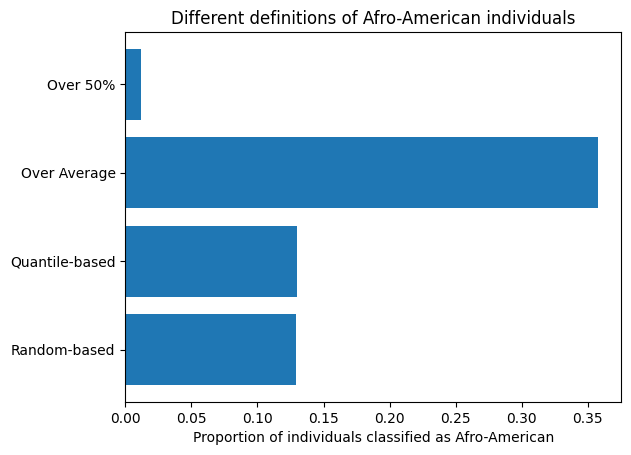

In [6]:
plt.barh(names[::-1], means[::-1])
plt.xlabel("Proportion of individuals classified as Afro-American")
plt.title("Different definitions of Afro-American individuals")
plt.show()

## Fairness tests and plots

In [ ]:
import numpy as np

from src.fairness import fairness_partial_dependance_plots, fairness_test_statistic

### Fairness tests

In [8]:
fairness_50_pct = fairness_test_statistic(df, model, is_afroamerican_50_pct)
fairness_avg = fairness_test_statistic(df, model, is_afroamerican_avg)
fairness_qb = fairness_test_statistic(df, model, is_afroamerican_qb)
fairness_rb = fairness_test_statistic(df, model, is_afroamerican_rb)

fairnesses = [fairness_50_pct, fairness_avg, fairness_qb, fairness_rb]

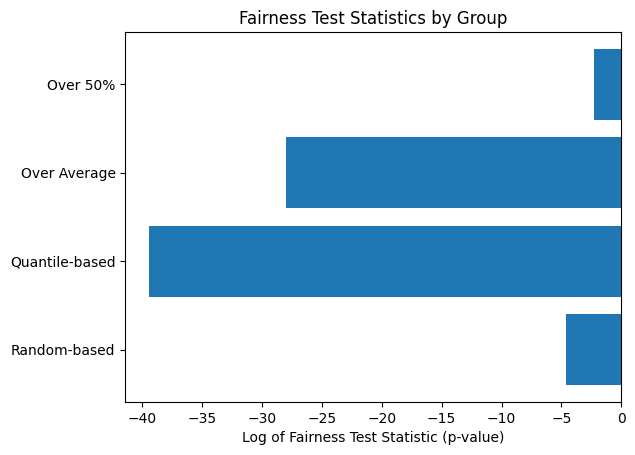

In [9]:
plt.barh(names[::-1], np.log10(fairnesses[::-1]))
plt.xlabel("Log of Fairness Test Statistic (p-value)")
plt.title("Fairness Test Statistics by Group")
plt.show()

### FPDPs

FileNotFoundError: [Errno 2] No such file or directory: '../results/fairness/fpdps/partial_dependence_issue_d.png'

<Figure size 640x480 with 0 Axes>

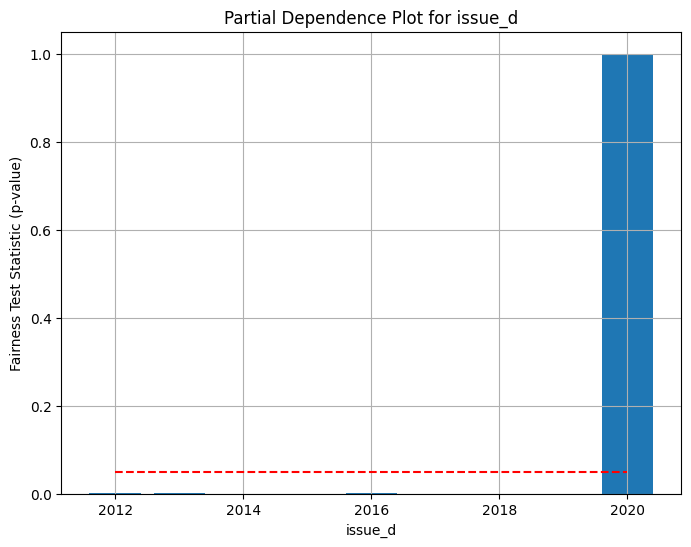

In [10]:
fairness_partial_dependance_plots(
    df,
    model,
    is_afroamerican_rb,
    n_points=10,
    file_dir="../results/fairness/fpdps",
    threshold=0.05,
)